In [1]:
# Uncomment and install psycopg2 library if needed
#!pip install psycopg2

In [2]:
# Import Libraries

import pandas as pd
import sqlalchemy
import psycopg2
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [3]:
# Create Engine
engine = create_engine("postgresql+psycopg2://postgres:Bias1981@/EmployeeSQL")
connection = engine.connect()

In [4]:
# Read Emplpoyees Table from Postgres Database

employees = pd.read_sql('select * from employees', connection)
employees.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,11/18/1954,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1/30/1958,Berry,Babb,F,1992-03-21
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1991-01-18


In [5]:
# Read Salaries Table from Postgres Database

salaries = pd.read_sql('select * from salaries', connection)
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [6]:
# Read titles Table from Postgres Database

titles = pd.read_sql('select * from titles', connection)
titles

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [7]:
# Join Employees and Salaries Tables

employee_salary = pd.merge(employees, salaries, on='emp_no')
employee_salary.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,11/18/1954,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1/30/1958,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1991-01-18,40000


In [8]:
# Rename title_id as emp_title_id from titles table to begin join

titles_ren = titles.rename(columns = {"title_id":"emp_title_id"})
titles_ren

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [9]:
# Join employee_salary and titles_ren Tables

emp_title = pd.merge(employee_salary, titles_ren, on='emp_title_id')
emp_title.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,9/28/1957,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,4/14/1957,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,3/23/1958,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1/19/1964,Venkatesan,Gilg,M,1993-06-28,63016,Staff


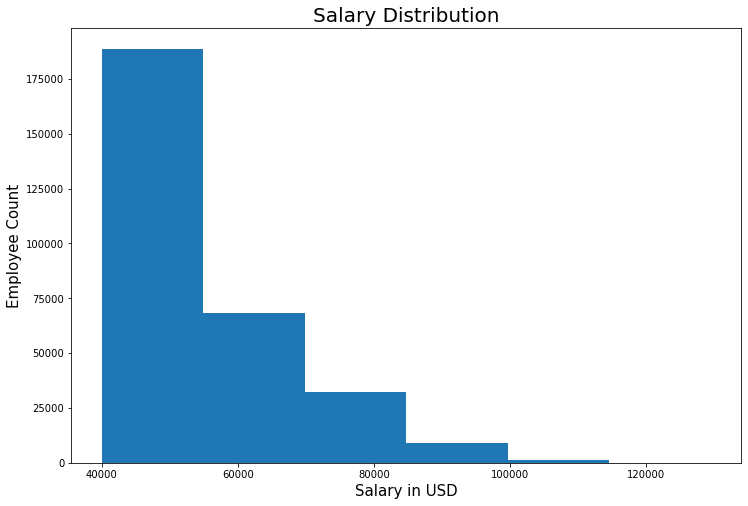

In [10]:
# Create a histogram to visualize the most common salary ranges for employees.

x = emp_title['salary']
plt.figure(figsize=(12, 8))
plt.hist(x, bins=6, range=(x.min(), x.max()))
plt.title('Salary Distribution', fontsize=20)
plt.xlabel('Salary in USD', fontsize=15)
plt.ylabel('Employee Count', fontsize=15)
plt.show()

In [11]:
emp_sal_title = emp_title[['title', 'salary']]
title_grp = emp_sal_title.groupby('title').mean('salary')
title_grp

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


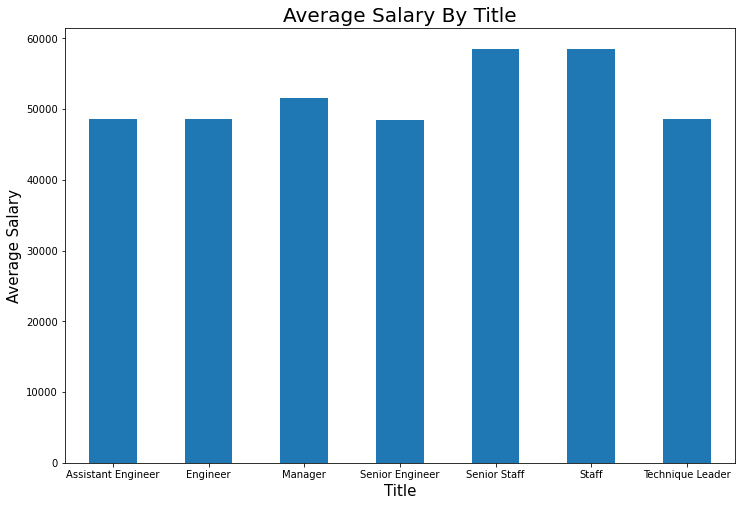

In [12]:
# Create a bar chart of average salary by title.

title_grp['salary'].plot(kind='bar', rot=0, figsize=(12, 8))

plt.title('Average Salary By Title', fontsize=20)
plt.xlabel('Title', fontsize=15)
plt.ylabel('Average Salary', fontsize=15)
plt.show()